In [4]:
path = 'calendula PikaNUV2.bip.hdr'

In [67]:
from spectral import *
import matplotlib.pyplot as plt
import numpy as np
import dreye
from dreye.estimators.dependent_excitation_models import DependentExcitationFit
from numpy.random import default_rng
import os

In [99]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100

In [6]:
img = open_image(path)

In [7]:
print(img)

	Data Source:   '.\.\calendula PikaNUV2.bip'
	# Rows:            500
	# Samples:        1500
	# Bands:           270
	Interleave:        BIP
	Quantization:  16 bits
	Data format:    uint16


In [ ]:
"""
500 line scans
1500 samples per line
270 chromatic chromatic steps
1.9 nm away from each other
starting at 
"""

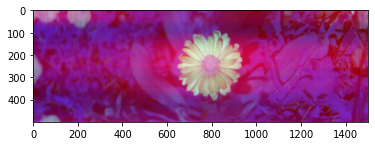

In [8]:
view = imshow(img)

In [9]:
arr = img.load()

In [11]:
arr.shape

(500, 1500, 270)

In [115]:
arr_cr = arr[50:450,600:1000,:]

In [116]:
arr_ds = arr_cr[::4, ::4]

In [117]:
arr_ds.shape

(100, 100, 270)

In [118]:
wls = [319.13, 320.94, 322.74, 324.54, 326.34, 328.15, 329.95, 331.76, 333.56, 335.36, 337.16, 338.97, 340.78, 342.58, 344.39, 346.2, 348.0, 349.81, 351.62, 353.42, 355.24, 357.04, 358.85, 360.66, 362.47, 364.28, 366.09, 367.9, 369.71, 371.52, 373.34, 375.15, 376.96, 378.77, 380.59, 382.4, 384.21, 386.03, 387.84, 389.66, 391.47, 393.29, 395.1, 396.92, 398.73, 400.55, 402.37, 404.19, 406.0, 407.82, 409.64, 411.46, 413.28, 415.1, 416.92, 418.74, 420.56, 422.38, 424.2, 426.02, 427.84, 429.66, 431.48, 433.3, 435.12, 436.95, 438.77, 440.6, 442.42, 444.24, 446.07, 447.9, 449.72, 451.54, 453.37, 455.2, 457.02, 458.85, 460.68, 462.5, 464.34, 466.16, 467.99, 469.82, 471.65, 473.48, 475.31, 477.14, 478.97, 480.8, 482.63, 484.46, 486.3, 488.13, 489.96, 491.79, 493.62, 495.46, 497.29, 499.13, 500.96, 502.8, 504.63, 506.47, 508.3, 510.14, 511.98, 513.81, 515.65, 517.49, 519.32, 521.16, 523.0, 524.84, 526.68, 528.52, 530.36, 532.2, 534.04, 535.88, 537.72, 539.56, 541.4, 543.24, 545.09, 546.93, 548.77, 550.62, 552.46, 554.3, 556.15, 557.99, 559.84, 561.68, 563.53, 565.37, 567.22, 569.07, 570.91, 572.76, 574.61, 576.46, 578.3, 580.15, 582.0, 583.85, 585.7, 587.55, 589.4, 591.25, 593.1, 594.95, 596.8, 598.66, 600.51, 602.36, 604.21, 606.07, 607.92, 609.77, 611.62, 613.48, 615.34, 617.19, 619.04, 620.9, 622.76, 624.62, 626.47, 628.33, 630.19, 632.04, 633.9, 635.76, 637.62, 639.48, 641.34, 643.19, 645.06, 646.92, 648.78, 650.64, 652.5, 654.36, 656.22, 658.08, 659.94, 661.81, 663.67, 665.54, 667.4, 669.26, 671.13, 672.99, 674.86, 676.72, 678.59, 680.46, 682.32, 684.19, 686.06, 687.92, 689.79, 691.66, 693.53, 695.4, 697.27, 699.14, 701.0, 702.88, 704.74, 706.62, 708.49, 710.36, 712.23, 714.1, 715.98, 717.84, 719.72, 721.6, 723.46, 725.34, 727.22, 729.09, 730.96, 732.84, 734.72, 736.59, 738.46, 740.34, 742.22, 744.1, 745.98, 747.86, 749.74, 751.62, 753.48, 755.36, 757.24, 759.12, 761.0, 762.88, 764.77, 766.66, 768.54, 770.42, 772.3, 774.18, 776.06, 777.94, 779.82, 781.71, 783.6, 785.48, 787.36, 789.25, 791.14, 793.02, 794.9, 796.8, 798.68, 800.56, 802.46, 804.34, 806.23, 808.12, 810.01, 811.9, 813.79, 815.68]

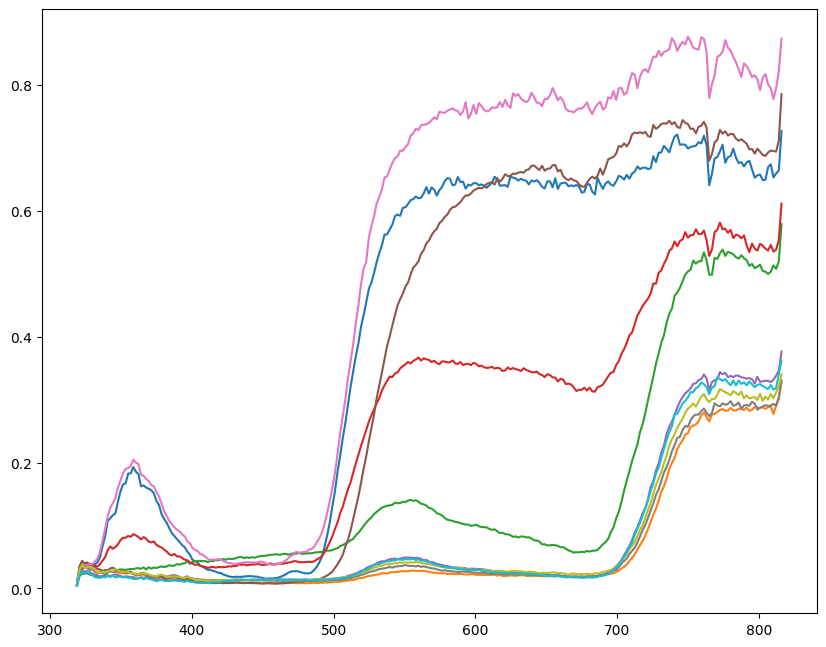

In [119]:
for _ in range(10):
        plt.plot(wls, arr_ds[np.random.randint(arr_ds.shape[0]),np.random.randint(arr_ds.shape[1])])

In [120]:
data = arr_ds.reshape(arr_ds.shape[0] * arr_ds.shape[1], arr_ds.shape[2])

In [121]:
data.shape, len(wls)

((10000, 270), 270)

In [137]:
WLS = np.arange(300, 700)

In [138]:
spectra = dreye.Signals(data.T, domain=wls, domain_units='nm', units='spectralirradiance').to('uE')(WLS, fill_value=0)
spectra[spectra.magnitude < 1e-4] = 1e-4

In [348]:
mspectra = dreye.create_measured_spectra_container([375, 420, 455, 530, 565], intensity_bounds=(0, 100000000))

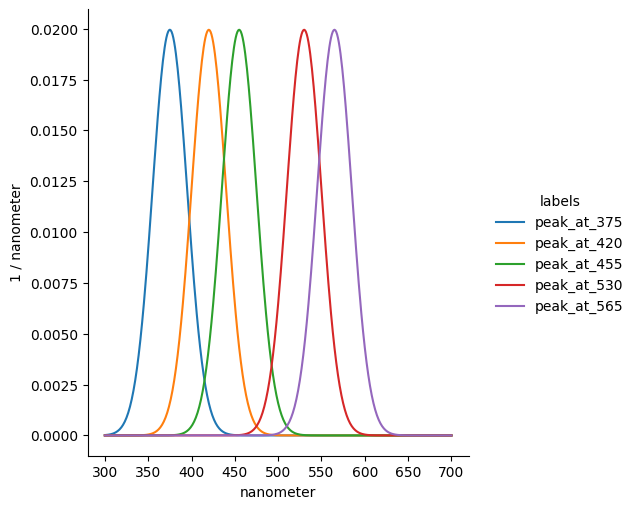

In [349]:
mspectra.normalized_spectra.plot()

In [374]:
pr_model = dreye.create_photoreceptor_model(
   [380, 450, 600 ], 
   # [450, 580, 630],
   photoreceptor_type='log', 
   capture_noise_level=1e-2
)

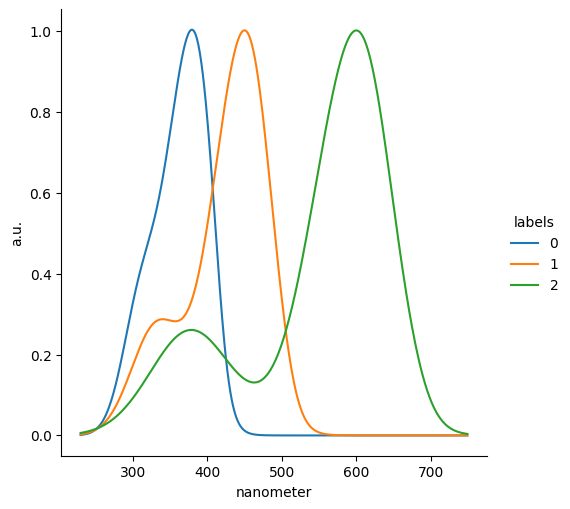

In [375]:
pr_model.sensitivity.plot()

In [376]:
# seed
rng = default_rng(14)

In [377]:
spectra.min()

0.0001 <Unit('microspectral_E_Q')>

In [378]:
background = dreye.Signal(spectra.mean(1), domain=spectra.domain)

In [379]:
background = 'norm'

In [380]:
X = pr_model.excitation(spectra, return_units=False, background=background)

In [381]:
X.min(0), X.max(0)

(array([-3.48786213, -3.60178612, -2.76994351]),
 array([-0.95781278, -0.71756134,  1.10737074]))

In [382]:
X.shape

(10000, 3)

In [383]:
model = DependentExcitationFit(
    photoreceptor_model=pr_model, 
    measured_spectra=mspectra, 
    ignore_bounds=True, 
    bit_depth=12, 
    independent_layers=3, 
    n_epochs=10, #5, 
    epoch_iter=3, #5 
    seed=100, 
    normalize_during_training=False, 
    round_during_training=False, 
    background=background
)

In [384]:
model.fit(X)

DependentExcitationFit(background='norm', bit_depth=12, epoch_iter=3,
                       ignore_bounds=True, independent_layers=3,
                       measured_spectra=MeasuredSpectraContainer([[0.0 587.7115962958369 1175.4231925916738 1763.1347888875107] [0.0 708.0299146153391 1416.0598292306781 2124.089743846017] [0.0 850.8504213965207 1701.7008427930414 2552.551264189562] ... [0.0 1.5343028182201868e-5...48567393e-32 3.750982497134786e-32 5.62647374570218e-32] ... [0.0 0.00016594529842618868 0.00033189059685237736 0.000497835895278566] [0.0 0.00011885546873415507 0.00023771093746831015 0.0003565664062024652] [0.0 8.491563264802855e-05 0.0001698312652960571 0.00025474689794408565]] microspectral_E_Q),
                       n_epochs=10,
                       photoreceptor_model=LogPhotoreceptor(0, 1, 2), seed=100)

In [385]:
model.score()

0.9951597652109586

In [386]:
model.feature_scores()

array([0.99083125, 0.99503295, 0.9996151 ])

In [387]:
model.feature_scores(method='threshrel', thresh=0.1)

array([1.    , 0.9991, 0.9951])

In [388]:
X.min(), X.max()

(-3.601786116664029, 1.107370735703296)

In [389]:
Xf = model.fitted_X_

In [390]:
Xmin = np.vstack([(X), (Xf)]).min(0)
Xmax = np.vstack([(X), (Xf)]).max(0)

In [391]:
Xn = ((X) - Xmin)/(Xmax-Xmin)

In [392]:
Xfn = ((Xf) - Xmin)/(Xmax - Xmin)

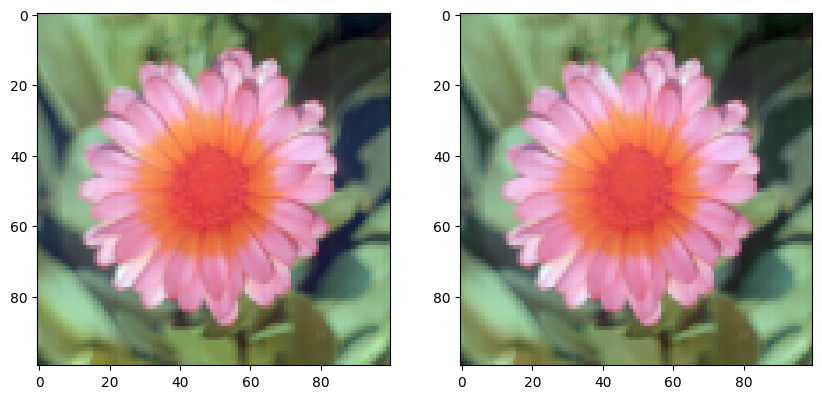

In [393]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(Xn.reshape(100, 100, -1)[..., ::-1])
ax2.imshow(Xfn.reshape(100, 100, -1)[..., ::-1])
plt.savefig('images.svg')

In [394]:
model_ind = dreye.IndependentExcitationFit(
    photoreceptor_model=pr_model, 
    measured_spectra=mspectra, 
    ignore_bounds=True, 
    background=background, 
    verbose=True, n_jobs=10
)

In [395]:
model_ind.fit(X)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.0s
[Parallel(n_jobs=10)]: Done 700 tasks      | elapsed:    6.4s
[Parallel(n_jobs=10)]: Done 10000 out of 10000 | elapsed:    7.9s finished


IndependentExcitationFit(background='norm', ignore_bounds=True,
                         measured_spectra=MeasuredSpectraContainer([[0.0 587.7115962958369 1175.4231925916738 1763.1347888875107] [0.0 708.0299146153391 1416.0598292306781 2124.089743846017] [0.0 850.8504213965207 1701.7008427930414 2552.551264189562] ... [0.0 1.5343028182201868e-51 3.0686056364403737e-51 4.602908454660561e-51]...567393e-32 3.750982497134786e-32 5.62647374570218e-32] ... [0.0 0.00016594529842618868 0.00033189059685237736 0.000497835895278566] [0.0 0.00011885546873415507 0.00023771093746831015 0.0003565664062024652] [0.0 8.491563264802855e-05 0.0001698312652960571 0.00025474689794408565]] microspectral_E_Q),
                         n_jobs=10,
                         photoreceptor_model=LogPhotoreceptor(0, 1, 2),
                         verbose=True)

In [396]:
model_ind.score()

1.0

In [397]:
model_ind.feature_scores()

array([1., 1., 1.])

In [398]:
tests = dreye.estimators.capture_tests.CaptureTests(
    photoreceptor_model=pr_model, 
    measured_spectra=mspectra, 
    #ignore_bounds=True, 
    background=background, 
)

In [399]:
ingamute = tests.capture_in_range(pr_model.inv_excitefunc(X))

In [400]:
ingamute.sum()/ingamute.size

1.0